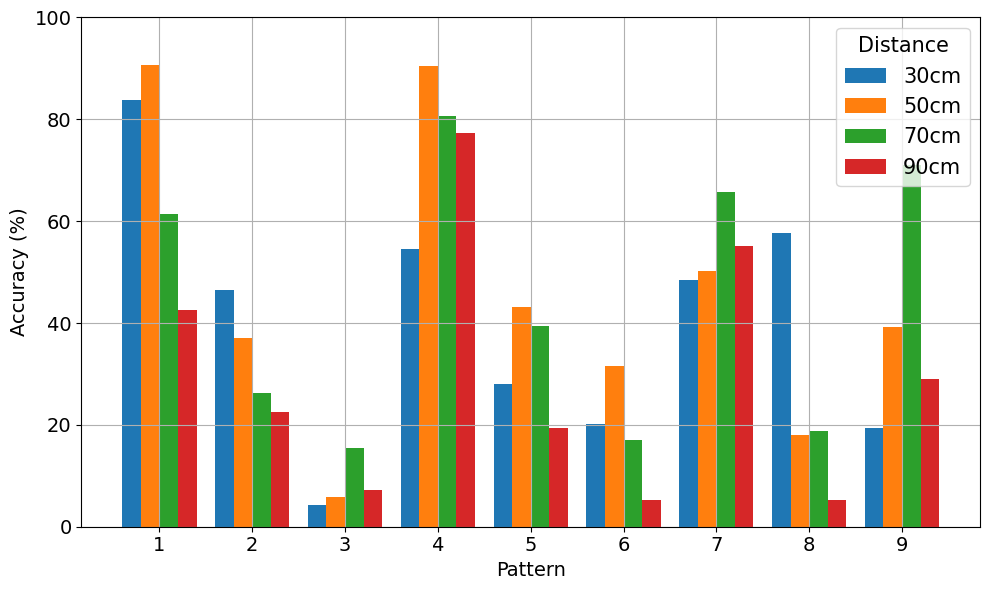

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define filenames and distances
files_bright = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

files_medium = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

files_low = {
    '30cm': 'data/Bright/detection_log_D30_bright.csv',
    '50cm': 'data/Bright/detection_log_D50_bright.csv',
    '70cm': 'data/Bright/detection_log_D70_bright.csv',
    '90cm': 'data/Bright/detection_log_D90_bright.csv'
}

bar_width = 0.2
pattern_ids = list(range(1, 10))
x = np.arange(len(pattern_ids))

plt.figure(figsize=(10, 6))

for i, (label, path) in enumerate(files_bright.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2)  # Ensure '01', '02' format
    df['Pattern'] = df['Pattern'].astype(int)               # Convert to integer 1–9
    values = df.set_index('Pattern').loc[pattern_ids]['Accuracy (%)']
    plt.bar(x + i * bar_width, values, width=bar_width, label=label)

plt.xlabel("Pattern", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.xticks(x + bar_width * 1.5, pattern_ids, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 100)
plt.legend(title="Distance", fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

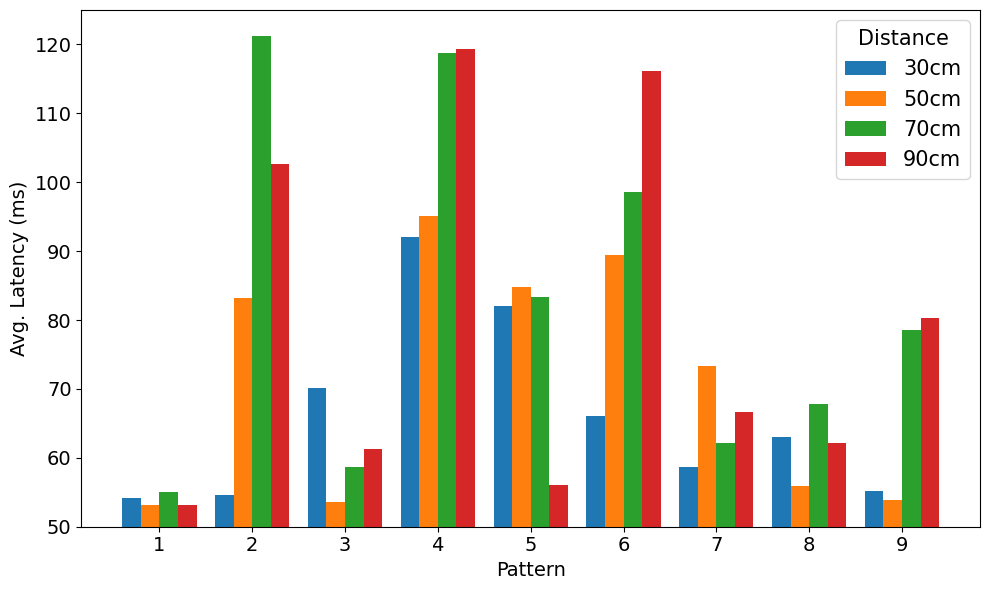

In [47]:
plt.figure(figsize=(10, 6))

for i, (label, path) in enumerate(files_bright.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2)
    df['Pattern'] = df['Pattern'].astype(int)
    values = df.set_index('Pattern').loc[pattern_ids]['Avg Latency (ms)']
    plt.bar(x + i * bar_width, values, width=bar_width, label=label)

plt.xlabel("Pattern", fontsize=14)
plt.ylabel("Avg. Latency (ms)", fontsize=14)
plt.xticks(x + bar_width * 1.5, pattern_ids, fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(50, 125)
plt.legend(title="Distance", fontsize=15, title_fontsize=15)
plt.tight_layout()
plt.show()

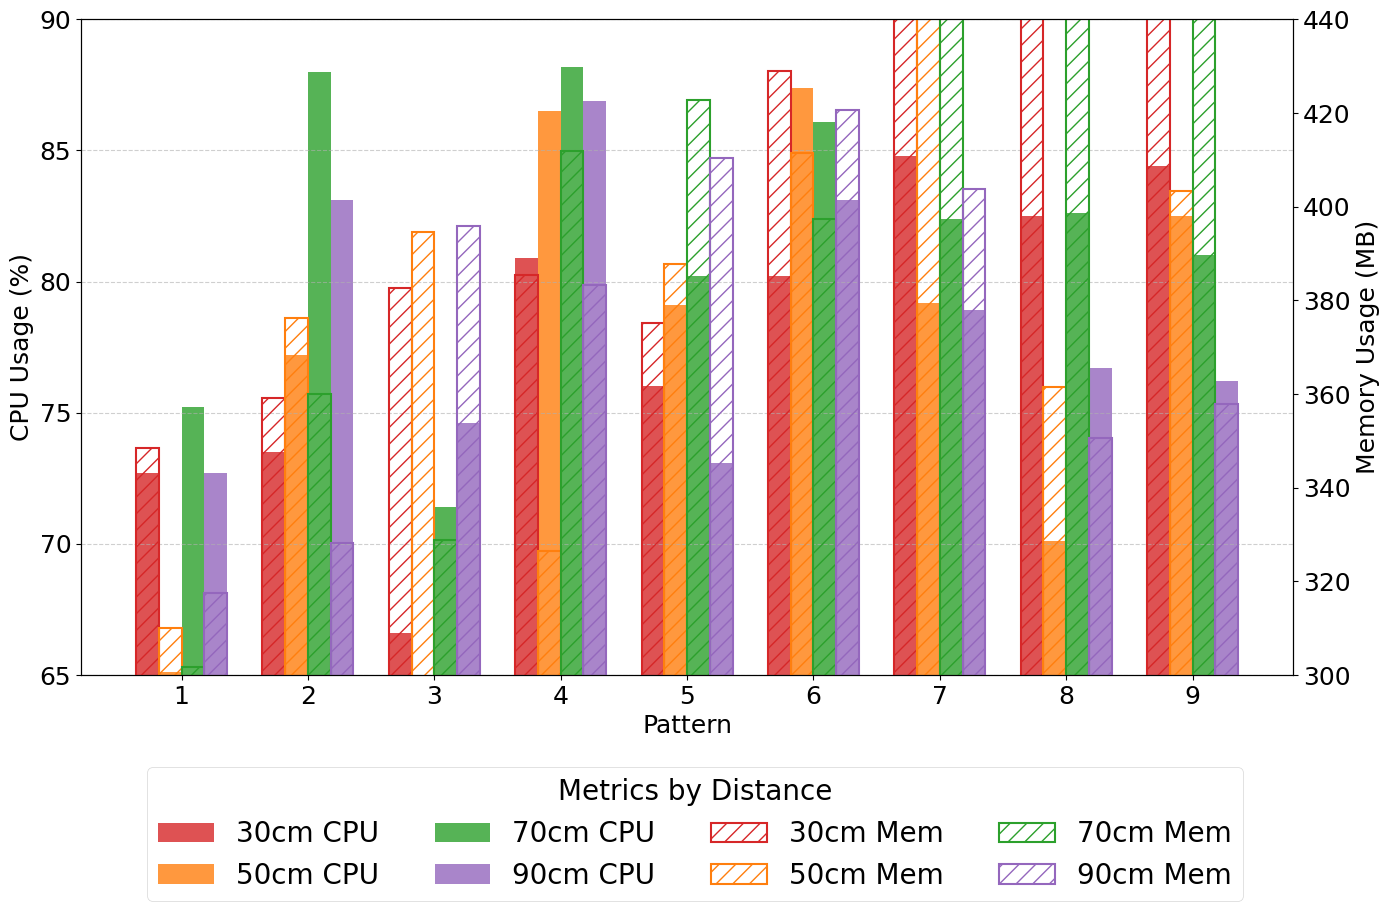

In [48]:
# Pattern indices
patterns = list(range(1, 10))
x = np.arange(len(patterns))
bar_w = 0.18

# Colors/hatching
cpu_colors = ['#d62728', '#ff7f0e', '#2ca02c', '#9467bd']
mem_hatches = ['//','//','//','//']

# Font sizes
LABEL_SIZE = 18
TICK_SIZE  = 18
LEGEND_SIZE = 20
LEGEND_TITLE = 20

# 2) Create figure
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()

# 3) Plot bars
for i, (label, path) in enumerate(files_bright.items()):
    df = pd.read_csv(path)
    df['Pattern'] = df['Pattern'].astype(str).str.zfill(2).astype(int)
    df.set_index('Pattern', inplace=True)
    cpu_vals = df.loc[patterns]['Avg CPU (%)']
    mem_vals = df.loc[patterns]['Avg Memory (MB)']
    offset = (i - 1.5) * bar_w

    # CPU
    ax1.bar(x + offset, cpu_vals, width=bar_w,
            color=cpu_colors[i], alpha=0.8,
            label=f'{label} CPU')
    # Memory
    ax2.bar(x + offset, mem_vals, width=bar_w,
            fill=False, edgecolor=cpu_colors[i],
            hatch=mem_hatches[i], linewidth=1.5,
            label=f'{label} Mem')

# 4) Labels & ticks
ax1.set_xlabel('Pattern', fontsize=LABEL_SIZE)
ax1.set_ylabel('CPU Usage (%)', fontsize=LABEL_SIZE)
ax2.set_ylabel('Memory Usage (MB)', fontsize=LABEL_SIZE)

ax1.set_xticks(x)
ax1.set_xticklabels(patterns, fontsize=TICK_SIZE)
ax1.set_yticks(np.arange(65, 91, 5))
ax1.tick_params(axis='y', labelsize=TICK_SIZE)
ax2.tick_params(axis='y', labelsize=TICK_SIZE)

ax1.set_ylim(65, 90)
ax2.set_ylim(300, 440)

ax1.grid(axis='y', linestyle='--', alpha=0.6)

# 5) Legend below
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
handles, labels = h1 + h2, l1 + l2

legend = fig.legend(handles, labels,
                    loc='lower center',
                    bbox_to_anchor=(0.5, -0.15),
                    ncol=4,
                    fontsize=LEGEND_SIZE,
                    title='Metrics by Distance',
                    title_fontsize=LEGEND_TITLE)
legend.get_frame().set_linewidth(0.5)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

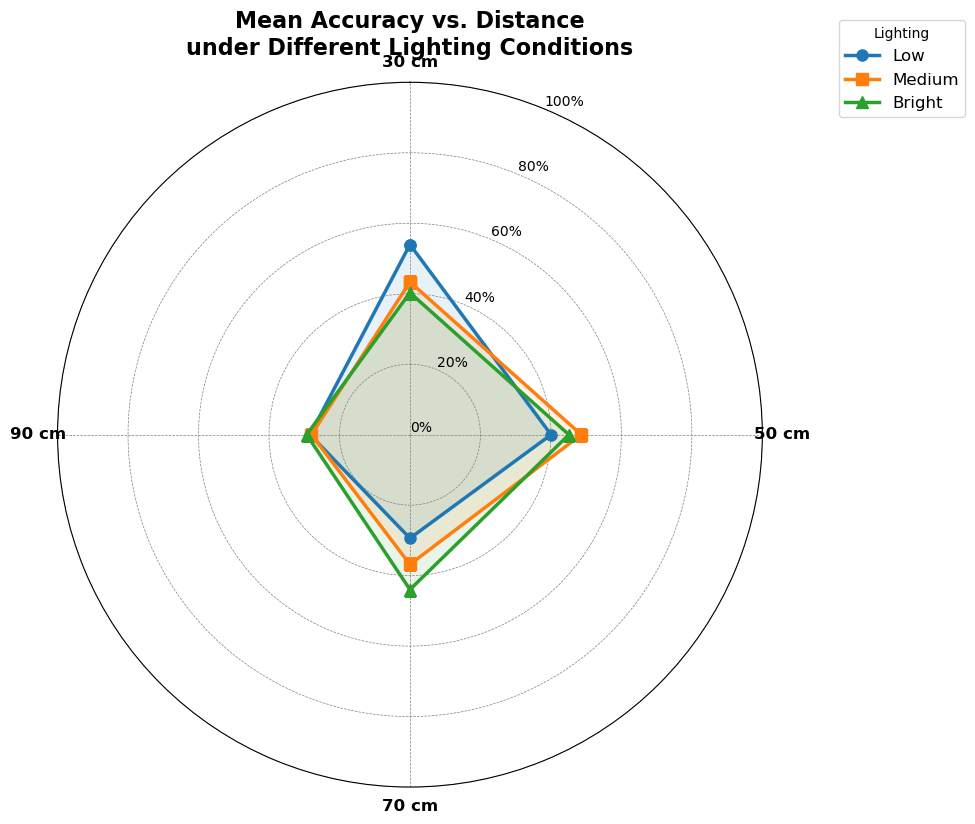

In [51]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
base_dir   = 'data'    # parent folder containing Low/, Medium/, Bright/
conditions = ['low', 'medium', 'bright']
distances  = ['30', '50', '70', '90']

# --- LOAD MEAN ACCURACY ---
mean_accuracy = {cond: [] for cond in conditions}
for cond in conditions:
    folder = os.path.join(base_dir, cond.capitalize())  # e.g. data/Low
    for d in distances:
        fname = f'detection_log_D{d}_{cond}.csv'
        path  = os.path.join(folder, fname)
        if os.path.exists(path):
            df  = pd.read_csv(path)
            # support both possible column names
            acc = pd.to_numeric(df.get('Accuracy (%)', df.get('Accuracy')), errors='coerce')
            mean_accuracy[cond].append(acc.mean())
        else:
            mean_accuracy[cond].append(np.nan)

# --- RADAR PLOT SETUP ---
labels = [f'{d} cm' for d in distances]
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the loop

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)  # start at top
ax.set_theta_direction(-1)      # clockwise

# draw distance labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')

# radial scale
radial_ticks = np.arange(0, 101, 20)
ax.set_yticks(radial_ticks)
ax.set_yticklabels([f'{t}%' for t in radial_ticks], fontsize=10)
ax.set_ylim(0, 100)
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# plot each lighting condition
colors  = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['o', 's', '^']

for i, cond in enumerate(conditions):
    vals = mean_accuracy[cond]
    vals_loop = vals + [vals[0]]  # close the shape
    ax.plot(angles, vals_loop,
            color=colors[i],
            linewidth=2.5,
            marker=markers[i],
            markersize=8,
            label=cond.capitalize())
    ax.fill(angles, vals_loop, color=colors[i], alpha=0.1)

# title & legend
ax.set_title('Mean Accuracy vs. Distance\nunder Different Lighting Conditions',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12, title='Lighting')

plt.tight_layout()
plt.show()

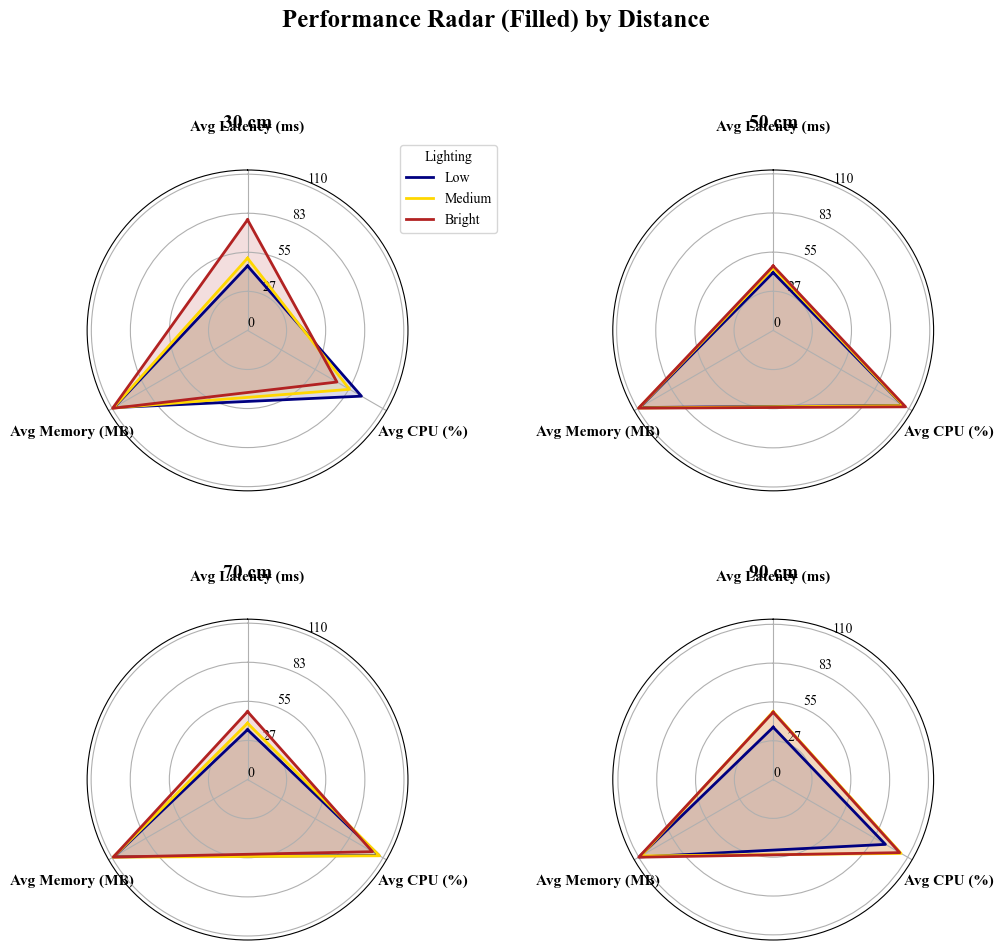

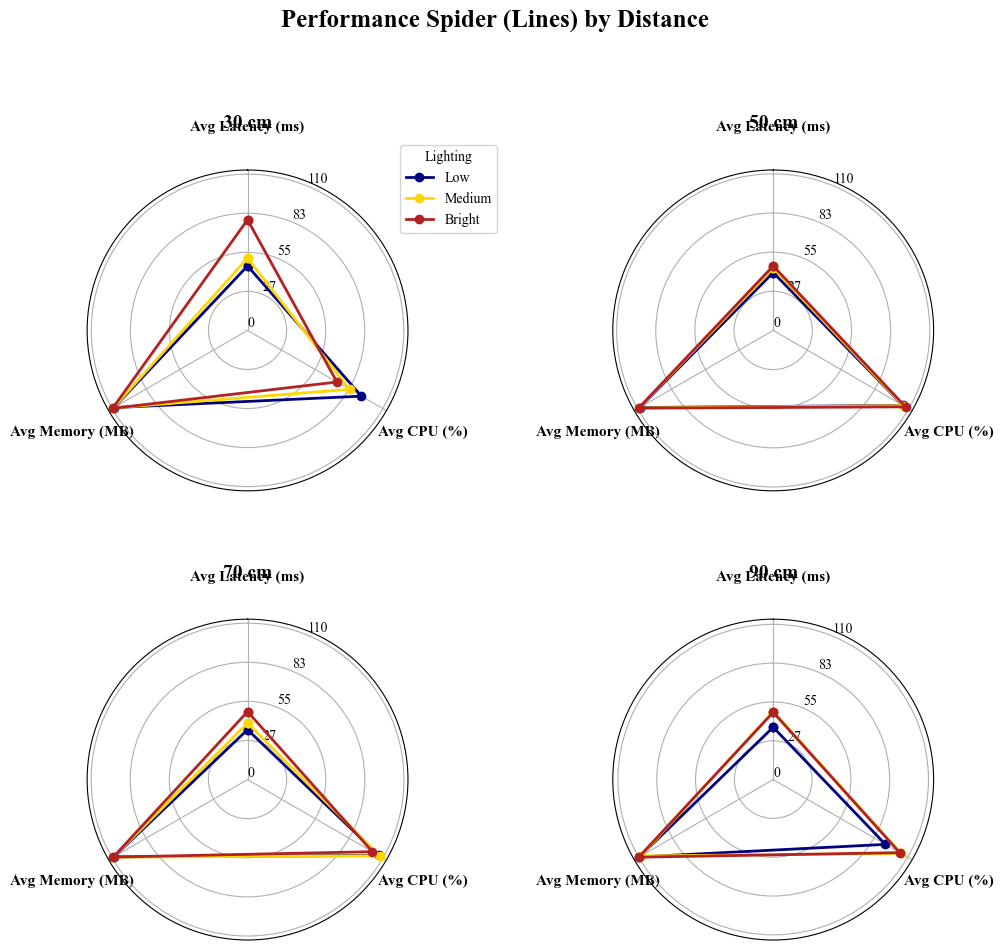

In [56]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- FONT CONFIGURATION ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman', 'Times', 'Liberation Serif', 'serif']

# --- DATA PATHS ---
data_dir   = 'data/VM_data'  # adjust to your folder
conditions = ['Low', 'Medium', 'Bright']
files = {
    cond: os.path.join(data_dir, f'detection_log_{cond.lower()}.csv')
    for cond in conditions
}

# --- LOAD & SORT DATA ---
data = {}
for cond, path in files.items():
    df = pd.read_csv(path).sort_values('Distance (cm)')
    data[cond] = df

distances = data['Low']['Distance (cm)'].tolist()
metrics   = ['Avg Latency (ms)', 'Avg CPU (%)', 'Avg Memory (MB)']

# --- AGGREGATE STATS ---
stats = {dist: {} for dist in distances}
for cond, df in data.items():
    for _, row in df.iterrows():
        dist = row['Distance (cm)']
        stats[dist][cond] = {m: row[m] for m in metrics}

# --- RADAR ANGLES ---
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# --- COLOR PALETTE ---
colors = ['navy', 'gold', 'firebrick']
max_val = max(df[m].max() for df in data.values() for m in metrics)

# --- 1) FILLED RADAR PLOTS ---
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(12, 10))
axs = axs.flatten()
for ax, dist in zip(axs, distances):
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    for cond, color in zip(conditions, colors):
        vals = [stats[dist][cond][m] for m in metrics]
        vals_loop = vals + [vals[0]]
        ax.plot(angles, vals_loop, color=color, linewidth=2, label=cond)
        ax.fill(angles, vals_loop, color=color, alpha=0.15)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', pad=20)         # push labels outward
    ax.set_yticks(np.linspace(0, max_val, 5))
    ax.set_yticklabels([f"{int(y)}" for y in np.linspace(0, max_val, 5)], fontsize=10)
    ax.set_title(f'{dist} cm', fontsize=14, fontweight='bold', pad=30)

axs[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title='Lighting')
plt.suptitle('Performance Radar (Filled) by Distance', fontsize=18, fontweight='bold', y=1.04)
plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.3)
plt.show()

# --- 2) LINE-ONLY SPIDER PLOTS ---
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(12, 10))
axs = axs.flatten()
for ax, dist in zip(axs, distances):
    ax.set_theta_offset(np.pi/2)
    ax.set_theta_direction(-1)
    for cond, color in zip(conditions, colors):
        vals = [stats[dist][cond][m] for m in metrics]
        vals_loop = vals + [vals[0]]
        ax.plot(angles, vals_loop, marker='o', color=color, linewidth=2, label=cond)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=11, fontweight='bold')
    ax.tick_params(axis='x', pad=20)
    ax.set_yticks(np.linspace(0, max_val, 5))
    ax.set_yticklabels([f"{int(y)}" for y in np.linspace(0, max_val, 5)], fontsize=10)
    ax.set_title(f'{dist} cm', fontsize=14, fontweight='bold', pad=30)

axs[0].legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), title='Lighting')
plt.suptitle('Performance Spider (Lines) by Distance', fontsize=18, fontweight='bold', y=1.04)
plt.subplots_adjust(top=0.88, hspace=0.4, wspace=0.3)
plt.show()